### Installations

In [14]:
!pip install geometric-smote

  Obtaining dependency information for geometric-smote from https://files.pythonhosted.org/packages/a7/95/587fc1077c12a9cf42d4322cfd64fb1f986622f581bea75f0ddd072c3529/geometric_smote-0.2.3-py3-none-any.whl.metadata
  Using cached geometric_smote-0.2.3-py3-none-any.whl.metadata (6.0 kB)
  Obtaining dependency information for imbalanced-learn>=0.11.0 from https://files.pythonhosted.org/packages/6e/1b/66764ecf370e797759be06fb38c11640ea1f9456ae10f8640a33cfa726ea/imbalanced_learn-0.12.2-py3-none-any.whl.metadata
  Using cached imbalanced_learn-0.12.2-py3-none-any.whl.metadata (8.2 kB)
Using cached geometric_smote-0.2.3-py3-none-any.whl (9.6 kB)
Using cached imbalanced_learn-0.12.2-py3-none-any.whl (257 kB)
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.10.1
    Uninstalling imbalanced-learn-0.10.1:
      Successfully uninstalled imbalanced-learn-0.10.1


In [1]:
!pip install xlrd>=2.0.1

### Required libraries

In [2]:
# Importing the necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np

In [3]:
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [120]:
# Importing the csv file
df = pd.read_excel('INX_Future_Inc_Employee_Performance_CDS_Project2_Data_V1.8.xls')

In [121]:
df.head()

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,E1001000,32,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,10,3,...,4,10,2,2,10,7,0,8,No,3
1,E1001006,47,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,14,4,...,4,20,2,3,7,7,1,7,No,3
2,E1001007,40,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Frequently,5,4,...,3,20,2,3,18,13,1,12,No,4
3,E1001009,41,Male,Human Resources,Divorced,Human Resources,Manager,Travel_Rarely,10,4,...,2,23,2,2,21,6,12,6,No,3
4,E1001010,60,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,16,4,...,4,10,1,3,2,2,2,2,No,3


In [122]:
df = df.drop('EmpNumber', axis=1)
print(df)

      Age  Gender EducationBackground MaritalStatus    EmpDepartment  \
0      32    Male           Marketing        Single            Sales   
1      47    Male           Marketing        Single            Sales   
2      40    Male       Life Sciences       Married            Sales   
3      41    Male     Human Resources      Divorced  Human Resources   
4      60    Male           Marketing        Single            Sales   
...   ...     ...                 ...           ...              ...   
1195   27  Female             Medical      Divorced            Sales   
1196   37    Male       Life Sciences        Single      Development   
1197   50    Male             Medical       Married      Development   
1198   34  Female             Medical        Single     Data Science   
1199   24  Female       Life Sciences        Single            Sales   

            EmpJobRole BusinessTravelFrequency  DistanceFromHome  \
0      Sales Executive           Travel_Rarely                10   

### Encoding the categorical variables

In [123]:
from sklearn.preprocessing import LabelEncoder

# List of categorical columns
# cat_columns = ['Gender', 'EducationBackground', 'MaritalStatus', 'EmpDepartment', 'EmpJobRole', 'BusinessTravelFrequency', 'Attrition']
cat_columns = df.select_dtypes(include='object').columns.tolist()

# # Initialize LabelEncoder
# encoder = LabelEncoder()

# # Encode categorical columns
# for col in cat_columns:
#     df[col] = encoder.fit_transform(df[col])   
    
# Initialize LabelEncoder
encoder_dict = {}

# Encode categorical columns and store the mapping
for col in cat_columns:
    encoder = LabelEncoder()
    df[col] = encoder.fit_transform(df[col])
    encoder_dict[col] = dict(zip(encoder.classes_, encoder.transform(encoder.classes_)))

# Now 'encoder_dict' contains the mapping between original labels and encoded values


In [124]:
df.describe()

,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
count,1200.000000,1200.000000,1200.00000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.00000,1200.000000,...,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000
mean,36.918333,0.604167,2.23500,1.096667,3.215000,9.039167,1.595000,9.165833,2.89250,2.715833,...,2.725000,11.330000,2.785833,2.744167,7.077500,4.291667,2.194167,4.105000,0.148333,2.948333
std,9.087289,0.489233,1.31004,0.731050,1.696911,4.754451,0.679234,8.176636,1.04412,1.090599,...,1.075642,7.797228,1.263446,0.699374,6.236899,3.613744,3.221560,3.541576,0.355578,0.518866
min,18.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000,1.00000,1.000000,...,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
25%,30.000000,0.000000,1.00000,1.000000,1.000000,4.000000,1.000000,2.000000,2.00000,2.000000,...,2.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000,0.000000,3.000000
50%,36.000000,1.000000,2.00000,1.000000,4.000000,9.000000,2.000000,7.000000,3.00000,3.000000,...,3.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000,0.000000,3.000000
75%,43.000000,1.000000,3.00000,2.000000,5.000000,13.000000,2.000000,14.000000,4.00000,4.000000,...,4.000000,15.000000,3.000000,3.000000,10.000000,7.000000,3.000000,7.000000,0.000000,3.000000
max,60.000000,1.000000,5.00000,2.000000,5.000000,18.000000,2.000000,29.000000,5.00000,4.000000,...,4.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000,1.000000,4.000000


In [125]:
df

,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,32,1,2,2,5,13,2,10,3,4,...,4,10,2,2,10,7,0,8,0,3
1,47,1,2,2,5,13,2,14,4,4,...,4,20,2,3,7,7,1,7,0,3
2,40,1,1,1,5,13,1,5,4,4,...,3,20,2,3,18,13,1,12,0,4
3,41,1,0,0,3,8,2,10,4,2,...,2,23,2,2,21,6,12,6,0,3
4,60,1,2,2,5,13,2,16,4,1,...,4,10,1,3,2,2,2,2,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,27,0,3,0,5,13,1,3,1,4,...,2,6,3,3,6,5,0,4,0,4
1196,37,1,1,2,1,15,2,10,2,4,...,1,4,2,3,1,0,0,0,0,3
1197,50,1,3,1,1,15,2,28,1,4,...,3,20,3,3,20,8,3,8,0,3
1198,34,0,3,2,0,1,2,9,3,4,...,2,9,3,4,8,7,7,7,0,3


In [9]:
# !pip install imblearn

### Resampling the dataset - Gsmote - Age

In [126]:
from gsmote import GeometricSMOTE

In [127]:
import pandas as pd
from imblearn.over_sampling import SMOTE

# Assuming your DataFrame has features and target variable columns
# Let's say your target variable column is named 'target'

# Separate features (X) and target variable (y)
X = df.drop('Age', axis=1)  # Drop the target column to get features
y = df['Age']  # Get the target column

# Apply SMOTE
gsmote =  GeometricSMOTE(k_neighbors=2,truncation_factor = 1, deformation_factor = 1)
X_resampled, y_resampled = gsmote.fit_resample(X, y)

# Combine the resampled features and target variable into a DataFrame
resampled_data = pd.DataFrame(X_resampled, columns=X.columns)
resampled_data['Age'] = y_resampled

# Save the DataFrame as a CSV file
# resampled_data.to_csv('resampled_dataset.csv', index=False)

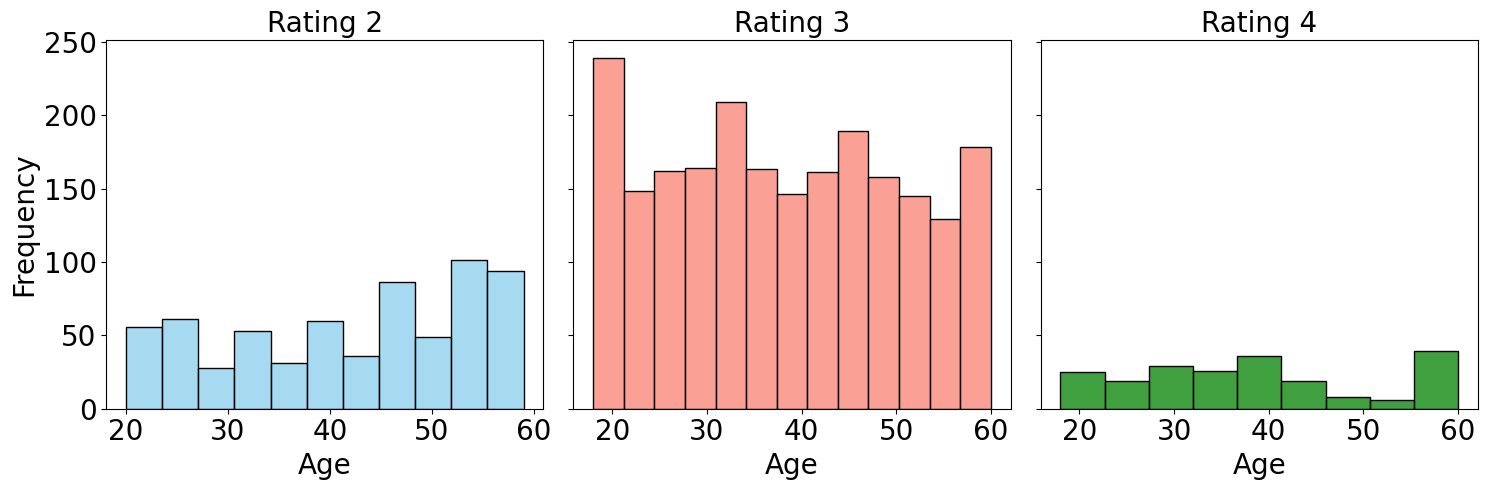

In [128]:
import seaborn as sns
import matplotlib.pyplot as plt

# Separate data by performance rating
rating_2_data = resampled_data[resampled_data['PerformanceRating'] == 2]
rating_3_data = resampled_data[resampled_data['PerformanceRating'] == 3]
rating_4_data = resampled_data[resampled_data['PerformanceRating'] == 4]

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)

# Plot for performance rating 2
sns.histplot(x='Age', data=rating_2_data, ax=axes[0], color='skyblue')
axes[0].set_title('Rating 2', fontsize=20)
axes[0].set_xlabel('Age', fontsize=20)
axes[0].set_ylabel('Frequency', fontsize=20)
axes[0].tick_params(axis='both', which='major', labelsize=20)

# Plot for performance rating 3
sns.histplot(x='Age', data=rating_3_data, ax=axes[1], color='salmon')
axes[1].set_title('Rating 3', fontsize=20)
axes[1].set_xlabel('Age', fontsize=20)
axes[1].set_ylabel('Frequency', fontsize=20)
axes[1].tick_params(axis='both', which='major', labelsize=20)

# Plot for performance rating 4
sns.histplot(x='Age', data=rating_4_data, ax=axes[2], color='green')
axes[2].set_title('Rating 4', fontsize=20)
axes[2].set_xlabel('Age', fontsize=20)
axes[2].set_ylabel('Frequency', fontsize=20)
axes[2].tick_params(axis='both', which='major', labelsize=20)

plt.tight_layout()
plt.show()

In [129]:
resampled_data

,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,...,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating,Age
0,1,2,2,5,13,2,10,3,4,55,...,10,2,2,10,7,0,8,0,3,32
1,1,2,2,5,13,2,14,4,4,42,...,20,2,3,7,7,1,7,0,3,47
2,1,1,1,5,13,1,5,4,4,48,...,20,2,3,18,13,1,12,0,4,40
3,1,0,0,3,8,2,10,4,2,73,...,23,2,2,21,6,12,6,0,3,41
4,1,2,2,5,13,2,16,4,1,84,...,10,1,3,2,2,2,2,0,3,60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3048,1,2,1,4,12,2,15,3,1,83,...,9,1,2,1,1,1,1,0,3,60
3049,0,1,0,1,3,2,7,2,1,41,...,31,4,1,28,6,11,9,0,3,60
3050,1,2,1,4,11,2,15,3,1,83,...,9,1,2,1,1,1,1,0,3,60
3051,0,1,0,1,3,2,7,2,1,41,...,32,4,1,28,6,11,9,0,3,60


In [130]:
resampled_data.describe()

,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,...,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating,Age
count,3053.000000,3053.000000,3053.000000,3053.000000,3053.000000,3053.000000,3053.000000,3053.000000,3053.000000,3053.000000,...,3053.000000,3053.000000,3053.000000,3053.000000,3053.000000,3053.000000,3053.000000,3053.000000,3053.000000,3053.000000
mean,0.479201,2.070750,0.938749,3.087783,8.806747,1.501474,8.848346,2.611530,2.482804,66.320996,...,11.974779,2.593187,2.554537,6.613495,3.784474,2.019325,3.563708,0.097281,2.853259,39.000000
std,0.499649,1.170677,0.692486,1.644371,4.648031,0.700880,8.049787,1.009988,1.028485,20.255199,...,9.369561,1.147785,0.703895,7.003274,3.588708,3.255193,3.456567,0.296389,0.510782,12.411707
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,30.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,18.000000
25%,0.000000,1.000000,0.000000,1.000000,4.000000,1.000000,2.000000,2.000000,2.000000,49.000000,...,5.000000,2.000000,2.000000,2.000000,1.000000,0.000000,1.000000,0.000000,3.000000,28.000000
50%,0.000000,2.000000,1.000000,4.000000,9.000000,2.000000,7.000000,3.000000,3.000000,66.000000,...,10.000000,2.000000,3.000000,5.000000,2.000000,1.000000,2.000000,0.000000,3.000000,39.000000
75%,1.000000,3.000000,1.000000,4.000000,13.000000,2.000000,14.000000,3.000000,3.000000,83.000000,...,18.000000,3.000000,3.000000,9.000000,7.000000,2.000000,7.000000,0.000000,3.000000,50.000000
max,1.000000,5.000000,2.000000,5.000000,18.000000,2.000000,29.000000,5.000000,4.000000,100.000000,...,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000,1.000000,4.000000,60.000000


### Resampling the dataset - Gsmote - Gender

In [131]:
import pandas as pd
from imblearn.over_sampling import SMOTE

# Assuming your DataFrame has features and target variable columns
# Let's say your target variable column is named 'target'

# Separate features (X) and target variable (y)
X = resampled_data.drop('Gender', axis=1)  # Drop the target column to get features
y = resampled_data['Gender']  # Get the target column

# Apply SMOTE
gsmote = GeometricSMOTE(k_neighbors=2,truncation_factor = 1, deformation_factor = 1)
X_resampled, y_resampled = gsmote.fit_resample(X, y)

# Combine the resampled features and target variable into a DataFrame
resampled_data = pd.DataFrame(X_resampled, columns=X.columns)
resampled_data['Gender'] = y_resampled

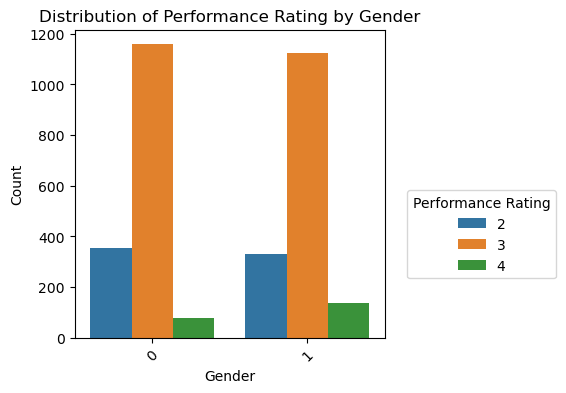

In [132]:
plt.figure(figsize=(4, 4))
sns.countplot(x='Gender', hue='PerformanceRating', data=resampled_data)
plt.title(f'Distribution of Performance Rating by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Performance Rating', bbox_to_anchor=(1.05, 0.5))
plt.show()

In [133]:
resampled_data

,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,...,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating,Age,Gender
0,2,2,5,13,2,10,3,4,55,3,...,2,2,10,7,0,8,0,3,32,1
1,2,2,5,13,2,14,4,4,42,3,...,2,3,7,7,1,7,0,3,47,1
2,1,1,5,13,1,5,4,4,48,2,...,2,3,18,13,1,12,0,4,40,1
3,0,0,3,8,2,10,4,2,73,2,...,2,2,21,6,12,6,0,3,41,1
4,2,2,5,13,2,16,4,1,84,3,...,1,3,2,2,2,2,0,3,60,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3175,3,1,3,6,1,17,3,2,50,2,...,2,2,10,8,0,9,0,3,29,1
3176,3,1,2,5,1,1,4,3,87,2,...,2,3,6,2,1,2,0,3,37,1
3177,1,1,5,13,1,4,3,2,64,3,...,2,2,8,7,6,7,0,2,52,1
3178,2,0,1,3,1,9,4,3,42,2,...,4,3,4,2,2,0,0,3,33,1


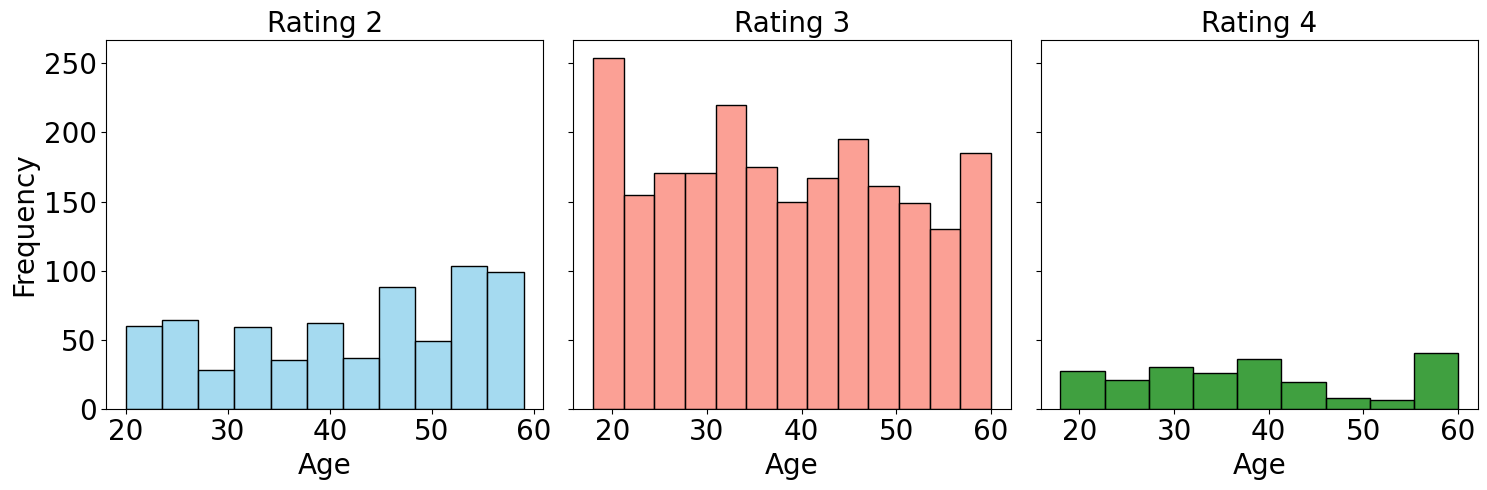

In [134]:
import seaborn as sns
import matplotlib.pyplot as plt

# Separate data by performance rating
rating_2_data = resampled_data[resampled_data['PerformanceRating'] == 2]
rating_3_data = resampled_data[resampled_data['PerformanceRating'] == 3]
rating_4_data = resampled_data[resampled_data['PerformanceRating'] == 4]

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)

# Plot for performance rating 2
sns.histplot(x='Age', data=rating_2_data, ax=axes[0], color='skyblue')
axes[0].set_title('Rating 2', fontsize=20)
axes[0].set_xlabel('Age', fontsize=20)
axes[0].set_ylabel('Frequency', fontsize=20)
axes[0].tick_params(axis='both', which='major', labelsize=20)

# Plot for performance rating 3
sns.histplot(x='Age', data=rating_3_data, ax=axes[1], color='salmon')
axes[1].set_title('Rating 3', fontsize=20)
axes[1].set_xlabel('Age', fontsize=20)
axes[1].set_ylabel('Frequency', fontsize=20)
axes[1].tick_params(axis='both', which='major', labelsize=20)

# Plot for performance rating 4
sns.histplot(x='Age', data=rating_4_data, ax=axes[2], color='green')
axes[2].set_title('Rating 4', fontsize=20)
axes[2].set_xlabel('Age', fontsize=20)
axes[2].set_ylabel('Frequency', fontsize=20)
axes[2].tick_params(axis='both', which='major', labelsize=20)

plt.tight_layout()
plt.show()

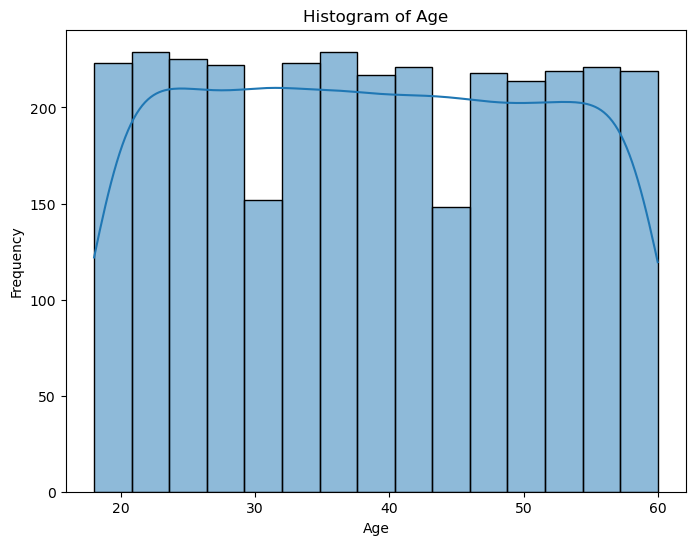

In [135]:
plt.figure(figsize=(8, 6))
sns.histplot(resampled_data['Age'], kde=True)
plt.title(f'Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

### Saving the resampled dataset for the model to train

In [62]:
resampled_data.to_csv('resampled_dataset_gsmote.csv', index=False)

In [137]:
# # Decode categorical columns
# decoded_df = resampled_data.copy()  # Make a copy to preserve the original DataFrame
# for col in cat_columns:
#     print(col)
#     decoded_df[col] = encoder.inverse_transform(decoded_df[col])


# Decode categorical columns using the stored mapping
decoded_df = df.copy()  # Make a copy to preserve the original DataFrame
for col in cat_columns:
    decoded_df[col] = decoded_df[col].map({v: k for k, v in encoder_dict[col].items()})
    
# Decode categorical columns using the stored mapping
decoded_df1 = resampled_data.copy()  # Make a copy to preserve the original DataFrame
for col in cat_columns:
    decoded_df1[col] = decoded_df1[col].map({v: k for k, v in encoder_dict[col].items()})

# Now 'decoded_df' contains the DataFrame with categorical variables decoded back to their original labels

# Now decoded_df contains the DataFrame with categorical variables decoded back to their original labels
# Save the DataFrame as a CSV file
# decoded_df.to_csv('resampled_dataset_original.csv', index=False)

In [138]:
resampled_data

,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,...,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating,Age,Gender
0,2,2,5,13,2,10,3,4,55,3,...,2,2,10,7,0,8,0,3,32,1
1,2,2,5,13,2,14,4,4,42,3,...,2,3,7,7,1,7,0,3,47,1
2,1,1,5,13,1,5,4,4,48,2,...,2,3,18,13,1,12,0,4,40,1
3,0,0,3,8,2,10,4,2,73,2,...,2,2,21,6,12,6,0,3,41,1
4,2,2,5,13,2,16,4,1,84,3,...,1,3,2,2,2,2,0,3,60,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3175,3,1,3,6,1,17,3,2,50,2,...,2,2,10,8,0,9,0,3,29,1
3176,3,1,2,5,1,1,4,3,87,2,...,2,3,6,2,1,2,0,3,37,1
3177,1,1,5,13,1,4,3,2,64,3,...,2,2,8,7,6,7,0,2,52,1
3178,2,0,1,3,1,9,4,3,42,2,...,4,3,4,2,2,0,0,3,33,1


In [139]:
resampled_data.describe()

,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,...,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating,Age,Gender
count,3180.000000,3180.000000,3180.000000,3180.000000,3180.000000,3180.000000,3180.000000,3180.000000,3180.000000,3180.000000,...,3180.000000,3180.000000,3180.000000,3180.000000,3180.000000,3180.000000,3180.000000,3180.000000,3180.000000,3180.000000
mean,2.069811,0.933648,3.083019,8.793082,1.502830,8.828931,2.597170,2.483333,66.421069,2.584277,...,2.581761,2.552516,6.565723,3.767610,2.001572,3.546855,0.094654,2.851887,38.848113,0.500000
std,1.173057,0.691248,1.642285,4.642753,0.700284,8.024399,1.007517,1.025028,20.207225,0.664191,...,1.147469,0.702807,6.938893,3.561674,3.235585,3.438400,0.292783,0.510117,12.417854,0.500079
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,30.000000,1.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,18.000000,0.000000
25%,1.000000,0.000000,1.000000,4.000000,1.000000,2.000000,2.000000,2.000000,49.000000,2.000000,...,2.000000,2.000000,2.000000,1.000000,0.000000,1.000000,0.000000,3.000000,28.000000,0.000000
50%,2.000000,1.000000,4.000000,9.000000,2.000000,7.000000,3.000000,3.000000,66.000000,3.000000,...,2.000000,3.000000,5.000000,2.000000,1.000000,2.000000,0.000000,3.000000,39.000000,0.500000
75%,3.000000,1.000000,4.000000,13.000000,2.000000,13.250000,3.000000,3.000000,83.000000,3.000000,...,3.000000,3.000000,9.000000,7.000000,2.000000,7.000000,0.000000,3.000000,50.000000,1.000000
max,5.000000,2.000000,5.000000,18.000000,2.000000,29.000000,5.000000,4.000000,100.000000,4.000000,...,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000,1.000000,4.000000,60.000000,1.000000


In [140]:
for col in resampled_data.columns:
    print(col, resampled_data[col].unique())

EducationBackground [2 1 0 3 4 5]
MaritalStatus [2 1 0]
EmpDepartment [5 3 1 0 4 2]
EmpJobRole [13  8  3 14  6 15  1 16  7 10 12  5 11  9  4 17  0 18  2]
BusinessTravelFrequency [2 1 0]
DistanceFromHome [10 14  5 16  8  1 24  3 27 19  9  2  7  6 26 11 23 13 29 12  4 25 21 18
 20 17 22 28 15]
EmpEducationLevel [3 4 2 5 1]
EmpEnvironmentSatisfaction [4 2 1 3]
EmpHourlyRate [ 55  42  48  73  84  32  54  67  63  81  49  99  57  96  44  86  83  61
  80  31  46  79  77  60  76  41  71  66  38  72  95  82  75  93  64  36
  69  33  35  40  43  51  52  98  45  37  94  59  88  50  65  53  56  78
  74  91  62  87  68  34  70 100  92  39  97  47  90  85  30  58  89]
EmpJobInvolvement [3 2 1 4]
EmpJobLevel [2 3 5 1 4]
EmpJobSatisfaction [4 1 2 3]
NumCompaniesWorked [1 2 5 3 8 7 9 4 6 0]
OverTime [0 1]
EmpLastSalaryHikePercent [12 21 15 14 13 23 11 20 19 17 18 22 16 24 25]
EmpRelationshipSatisfaction [4 3 2 1]
TotalWorkExperienceInYears [10 20 23  9  4 28  1  7 12 30  5  2 19 16 34  6  8 11 17  3 14

### Plots for presentation and report

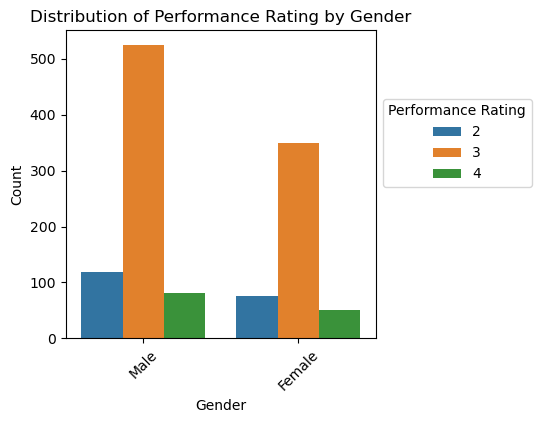

In [142]:
plot_df = resampled_data

plt.figure(figsize=(4, 4))
sns.countplot(x='Gender', hue='PerformanceRating', data=decoded_df)
plt.title(f'Distribution of Performance Rating by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Performance Rating', bbox_to_anchor=(1.0, 0.8))
plt.show()

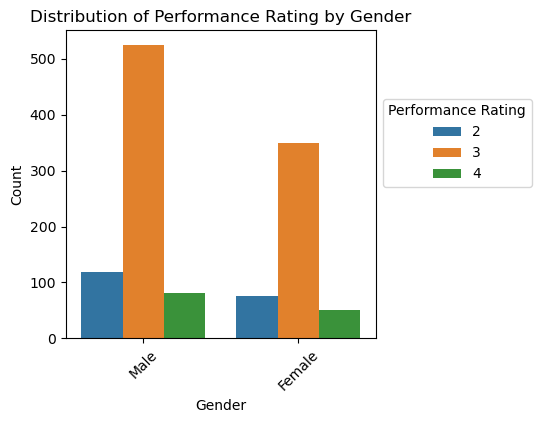

In [143]:
plot_df = df

plt.figure(figsize=(4, 4))
sns.countplot(x='Gender', hue='PerformanceRating', data=decoded_df)
plt.title(f'Distribution of Performance Rating by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Performance Rating', bbox_to_anchor=(1.0, 0.8))
plt.show()

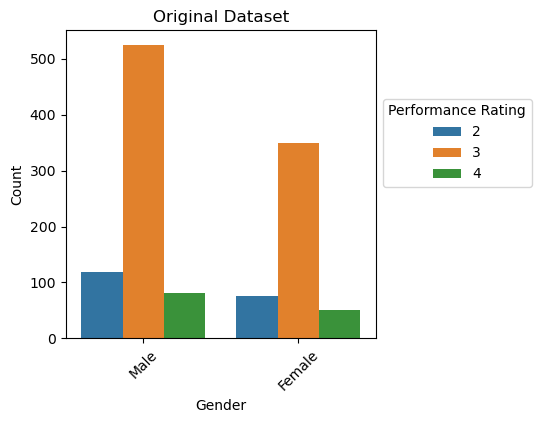

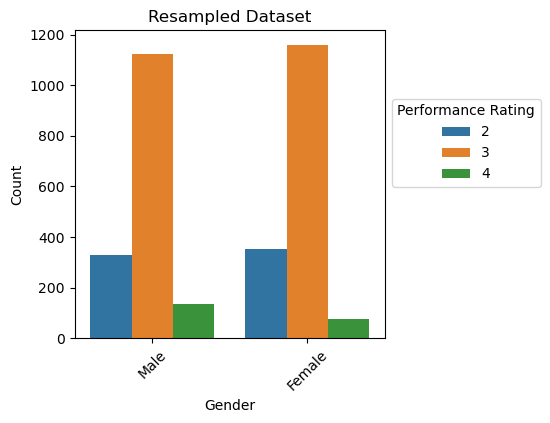

In [145]:
plt.figure(figsize=(4, 4))
sns.countplot(x='Gender', hue='PerformanceRating', data=decoded_df)
plt.title(f'Original Dataset')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Performance Rating', bbox_to_anchor=(1.0, 0.8))
# plt.gca().legend_.remove()
plt.show()

plt.figure(figsize=(4, 4))
sns.countplot(x='Gender', hue='PerformanceRating', data=decoded_df1)
plt.title(f'Resampled Dataset')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Performance Rating', bbox_to_anchor=(1.0, 0.8))
# plt.gca().legend_.remove()
plt.show()

In [146]:
decoded_df

,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,32,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,10,3,4,...,4,10,2,2,10,7,0,8,No,3
1,47,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,14,4,4,...,4,20,2,3,7,7,1,7,No,3
2,40,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Frequently,5,4,4,...,3,20,2,3,18,13,1,12,No,4
3,41,Male,Human Resources,Divorced,Human Resources,Manager,Travel_Rarely,10,4,2,...,2,23,2,2,21,6,12,6,No,3
4,60,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,16,4,1,...,4,10,1,3,2,2,2,2,No,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,27,Female,Medical,Divorced,Sales,Sales Executive,Travel_Frequently,3,1,4,...,2,6,3,3,6,5,0,4,No,4
1196,37,Male,Life Sciences,Single,Development,Senior Developer,Travel_Rarely,10,2,4,...,1,4,2,3,1,0,0,0,No,3
1197,50,Male,Medical,Married,Development,Senior Developer,Travel_Rarely,28,1,4,...,3,20,3,3,20,8,3,8,No,3
1198,34,Female,Medical,Single,Data Science,Data Scientist,Travel_Rarely,9,3,4,...,2,9,3,4,8,7,7,7,No,3


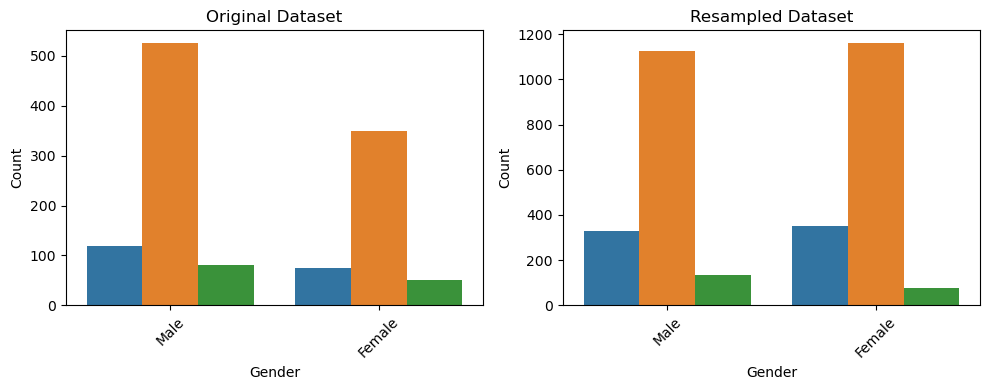

In [147]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 4))  # 1 row, 2 columns

plt.title('Distribution of Performance Rating by Gender')

# Plot the first count plot
sns.countplot(x='Gender', hue='PerformanceRating', data=decoded_df, ax=axes[0])
axes[0].set_title('Original Dataset')
axes[0].set_xlabel('Gender')
axes[0].set_ylabel('Count')
axes[0].tick_params(axis='x', rotation=45)
axes[0].legend_.remove()

# Plot the second count plot
sns.countplot(x='Gender', hue='PerformanceRating', data=decoded_df1, ax=axes[1])
axes[1].set_title('Resampled Dataset')
axes[1].set_xlabel('Gender')
axes[1].set_ylabel('Count')
axes[1].tick_params(axis='x', rotation=45)

# Add a legend to the first subplot
# axes[1].legend(title='Performance Rating', loc='right')
axes[1].legend_.remove()


plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


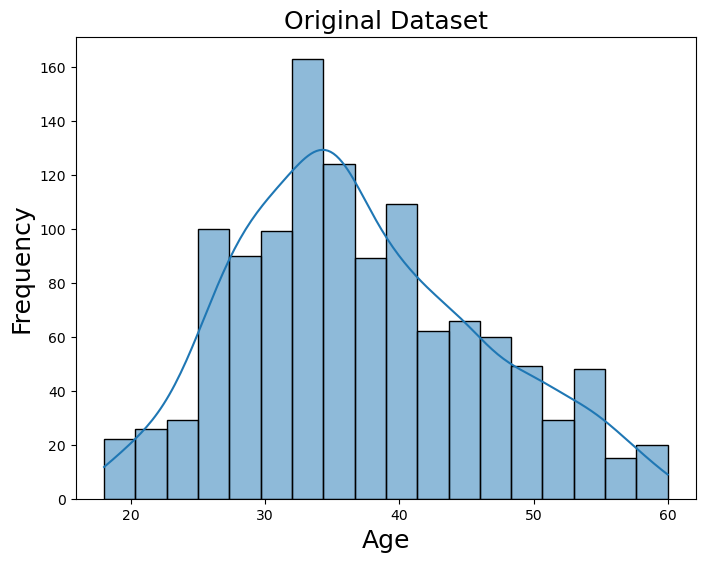

In [148]:
plt.figure(figsize=(8, 6))
sns.histplot(df['Age'], kde=True)
plt.title(f'Original Dataset', fontsize=18)
plt.xlabel('Age', fontsize=18)
plt.ylabel('Frequency', fontsize=18)
plt.show()

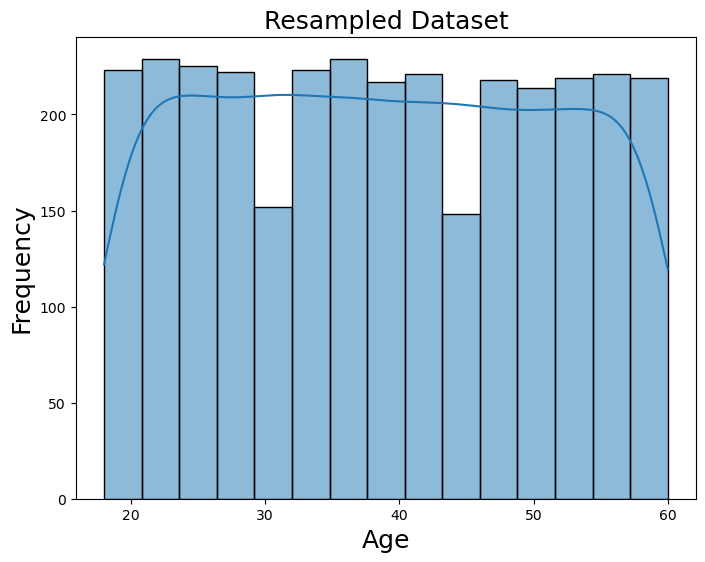

In [149]:
plt.figure(figsize=(8, 6))
sns.histplot(resampled_data['Age'], kde=True)
plt.title(f'Resampled Dataset', fontsize=18)
plt.xlabel('Age', fontsize=18)
plt.ylabel('Frequency', fontsize=18)
plt.show()